In [10]:
library(dplyr)
library(ggplot2)
library(cowplot)

In [1]:
revision_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [2]:
### chr19 only, gaussianized y

In [3]:
gauss_folder = paste0(revision_folder,"limix_qtl_pipeline_Gtest/Gtest_10MOFA/results_mj/TestOutChr19_Gauss/")

In [4]:
list.files(gauss_folder)

[1] "Perm"                       "permutationInformation.txt"
[3] "qtl_results_all.txt"        "top_qtl_results_all.txt"

In [5]:
res_filename = paste0(gauss_folder,"qtl_results_all.txt")
leads_filename = paste0(gauss_folder,"top_qtl_results_all.txt")
perms_filename = paste0(gauss_folder,"permutationInformation.txt")

In [9]:
res = read.csv(res_filename, sep="\t")
nrow(res)
head(res,2)

[1] 997544

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000083844,19_57703077_T_G,7.682972e-06,-0.08074288,0.01804454,4.813915e-09,19,57702868,57724724,27598,99,2.369113,62.11524,0.8,19,57703077,G,1,0.4141414,1
ENSG00000083844,19_57703209_T_C,7.682972e-06,-0.08074288,0.01804454,4.813915e-09,19,57702868,57724724,27598,99,2.369113,62.11524,0.8,19,57703209,C,1,0.4141414,1


In [7]:
leads = read.csv(leads_filename, sep="\t")
nrow(leads)
head(leads,2)

[1] 894

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
19_57703077_T_G,7.682972e-06,-0.08074288,0.01804454,4.813915e-09,19,57702868,57724724,27598,99,2.369113,62.11524,0.8,19,57703077,G,1,0.4141414,1.0000000,ENSG00000083844
19_53813914_G_A,5.022754e-05,-0.13196793,0.03254313,1.804120e-01,19,53662466,53696639,27598,99,1.156792,5471.45482,0.9,19,53813914,A,1,0.4343434,0.3134153,ENSG00000197497


In [11]:
perms = read.csv(perms_filename, sep="\t")
nrow(perms)
perms$feature_id = perms$feature
head(perms,2)

[1] 956698

permutation_0,permutation_1,permutation_10,permutation_11,permutation_12,permutation_13,permutation_14,permutation_15,permutation_16,permutation_17,...,permutation_49,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9,snp_id,feature,QTL,feature_id
0.1407506,0.9770695,0.7859635,0.4443194,0.2565630,0.9742026,0.3085313,0.9772020,0.6587492,0.6824671,...,0.7771699,0.2091001,0.5533270,0.2067854,0.4781553,0.6537726,19_226776_C_T,ENSG00000225373,19_226776_C_T-ENSG00000225373,ENSG00000225373
0.2184143,0.7252011,0.7236836,0.1958456,0.5020878,0.8995166,0.3495155,0.7774671,0.6182807,0.7375048,...,0.1345574,0.5577587,0.2884442,0.4847041,0.6191658,0.5095372,19_240867_A_C,ENSG00000225373,19_240867_A_C-ENSG00000225373,ENSG00000225373


In [ ]:
########### all SNP-gene pairs

In [19]:
res2 = inner_join(res,perms, by = c("snp_id","feature_id"))
nrow(res2)
head(res2,2)

[1] 997544

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,...,permutation_47,permutation_48,permutation_49,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9,feature,QTL
ENSG00000083844,19_57703077_T_G,7.682972e-06,-0.08074288,0.01804454,4.813915e-09,19,57702868,57724724,27598,...,0.09337848,0.6559165,0.3299395,0.1840948,0.685822,0.4902016,0.9999473,0.7132376,ENSG00000083844,19_57703077_T_G-ENSG00000083844
ENSG00000083844,19_57703209_T_C,7.682972e-06,-0.08074288,0.01804454,4.813915e-09,19,57702868,57724724,27598,...,0.09337848,0.6559165,0.3299395,0.1840948,0.685822,0.4902016,0.9999473,0.7132376,ENSG00000083844,19_57703209_T_C-ENSG00000083844


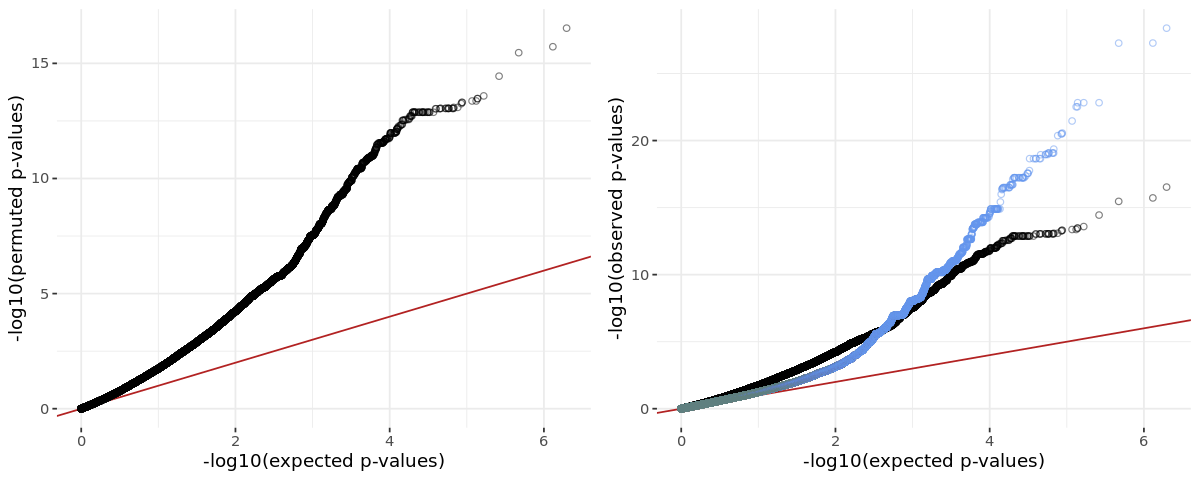

In [14]:
df = res2
df$pv_uniform = runif(dim(df)[1], min = 0, max = 1)
p1 = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_1)))) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1) + xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
p2 = ggplot(df) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_1)))) +
        geom_point(color = "cornflowerblue", alpha = 0.5, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(p_value)))) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
options(repr.plot.width = 10, repr.plot.height = 4) 
plot_grid(p1, p2, ncol = 2)

In [ ]:
#### one SNP per gene (at random)

In [28]:
res3 = res2[sample(nrow(res2)),]
res3 = res3[-which(duplicated(res3$feature_id)),]

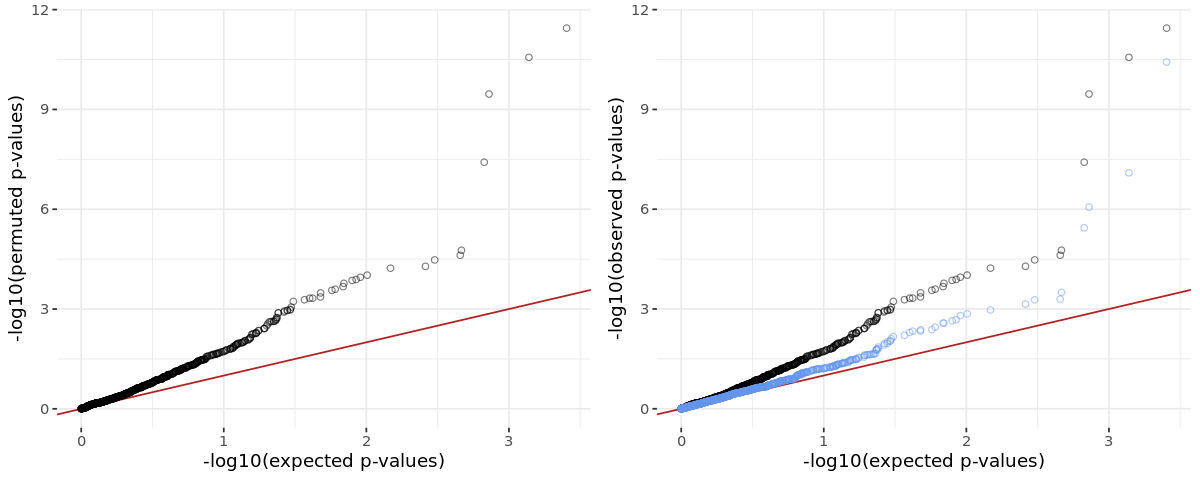

In [29]:
df = res3
df$pv_uniform = runif(dim(df)[1], min = 0, max = 1)
p1 = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_3)))) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1) + xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
p2 = ggplot(df) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_3)))) +
        geom_point(color = "cornflowerblue", alpha = 0.5, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(p_value)))) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
options(repr.plot.width = 10, repr.plot.height = 4) 
plot_grid(p1, p2, ncol = 2)

In [ ]:
#### top SNP per gene (min p-value)

In [17]:
leads2 = inner_join(leads,perms, by = c("snp_id","feature_id"))
nrow(leads2)
head(leads2,2)

[1] 894

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,permutation_47,permutation_48,permutation_49,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9,feature,QTL
19_57703077_T_G,7.682972e-06,-0.08074288,0.01804454,4.813915e-09,19,57702868,57724724,27598,99,...,0.09337848,0.65591645,0.32993951,0.18409477,0.68582200,0.49020160,0.99994728,0.7132376,ENSG00000083844,19_57703077_T_G-ENSG00000083844
19_53813914_G_A,5.022754e-05,-0.13196793,0.03254313,1.804120e-01,19,53662466,53696639,27598,99,...,0.47370723,0.06371429,0.06011045,0.04753995,0.01370145,0.01295219,0.08188454,0.5192803,ENSG00000197497,19_53813914_G_A-ENSG00000197497


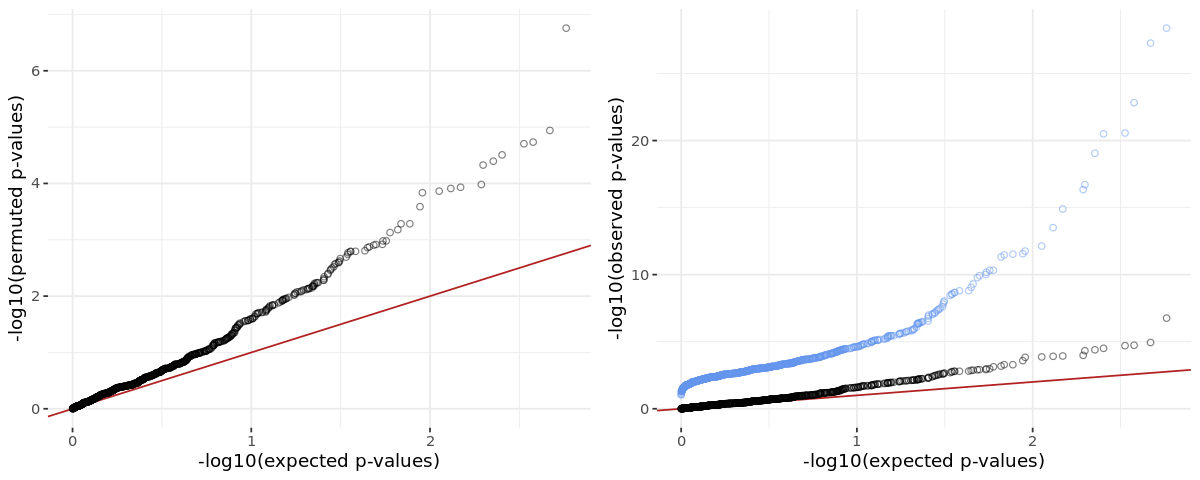

In [18]:
df = leads2
df$pv_uniform = runif(dim(df)[1], min = 0, max = 1)
p1 = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_1)))) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1) + xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
p2 = ggplot(df) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_1)))) +
        geom_point(color = "cornflowerblue", alpha = 0.5, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(p_value)))) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
options(repr.plot.width = 10, repr.plot.height = 4) 
plot_grid(p1, p2, ncol = 2)